In [1]:
from google.colab import files 

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ridhdhish","key":"dce4beb8c344ab362d8d73d18f10a365"}'}

In [3]:
! mkdir ~/.kaggle 

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-01 17:39:01          13330  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8013  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3502  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           3083  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [7]:
! kaggle datasets download moltean/fruits

100% 1.28G/1.28G [00:10<00:00, 138MB/s]
100% 1.28G/1.28G [00:10<00:00, 137MB/s]


In [8]:
! unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360_dataset/fruits-360/Traini

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader


In [10]:
path = '/content/fruits-360_dataset/fruits-360'
print('Folders :', os.listdir(path))
classes = os.listdir(path + "/Training")
print('131 classes :', classes)

Folders : ['Test', 'test-multiple_fruits', 'papers', 'LICENSE', 'readme.md', 'Training']
131 classes : ['Blueberry', 'Clementine', 'Onion Red Peeled', 'Tomato Cherry Red', 'Melon Piel de Sapo', 'Chestnut', 'Potato Red Washed', 'Pepper Green', 'Apple Red Yellow 1', 'Pepper Orange', 'Cucumber Ripe', 'Cherry Wax Red', 'Pear Kaiser', 'Cherry Rainier', 'Nut Pecan', 'Apple Braeburn', 'Nut Forest', 'Cherry Wax Black', 'Tomato 4', 'Peach Flat', 'Apple Red 2', 'Rambutan', 'Limes', 'Cantaloupe 1', 'Pear 2', 'Plum 3', 'Grape White', 'Tomato Heart', 'Grape Pink', 'Grape White 3', 'Pomegranate', 'Pepper Red', 'Grape White 4', 'Pear Red', 'Grapefruit White', 'Grapefruit Pink', 'Apricot', 'Cucumber Ripe 2', 'Plum', 'Peach', 'Pear Stone', 'Redcurrant', 'Ginger Root', 'Grape Blue', 'Pineapple', 'Banana Red', 'Hazelnut', 'Tomato Maroon', 'Pear', 'Nectarine Flat', 'Apple Red Delicious', 'Salak', 'Apple Red 1', 'Physalis with Husk', 'Tangelo', 'Tomato 2', 'Corn Husk', 'Avocado ripe', 'Strawberry Wedge', '

In [11]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
dataset = ImageFolder(path + '/Training', transform=ToTensor())
print('Size of training dataset :', len(dataset))
test = ImageFolder(path + '/Test', transform=ToTensor())
print('Size of test dataset :', len(test))

Size of training dataset : 67692
Size of test dataset : 22688


In [12]:
img, label = dataset[5000]
print(img.shape)


torch.Size([3, 100, 100])


In [13]:
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Red Delicious (10)


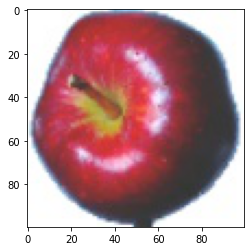

In [14]:
show_image(img, label)

In [15]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 5000
num_epochs = n_iters / (len(dataset) / batch_size)
num_epochs = int(num_epochs)

In [16]:
# data loader
train_loader = DataLoader(dataset, batch_size = batch_size, shuffle = True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = True, num_workers=4, pin_memory=True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


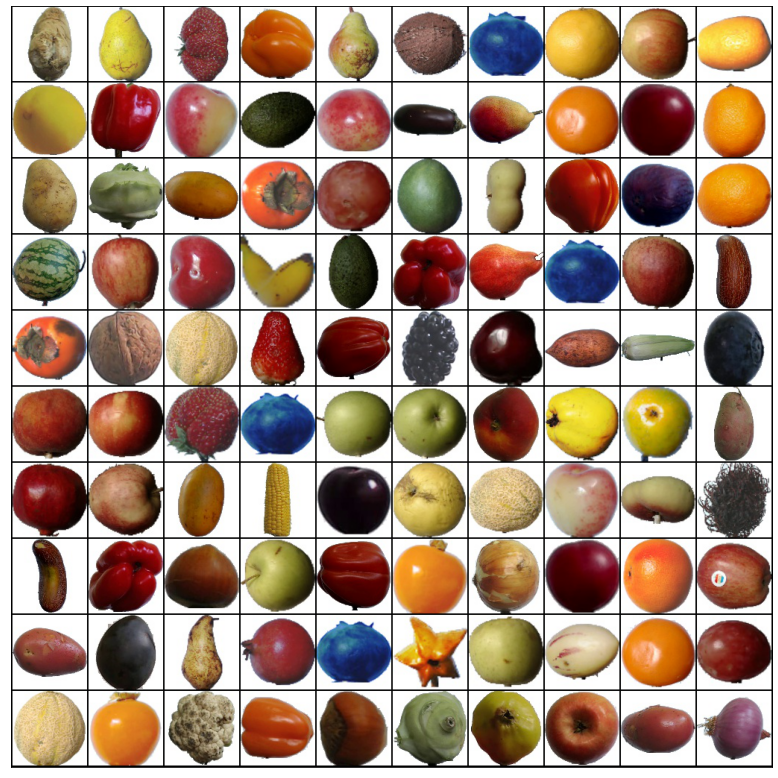

In [17]:
from torchvision.utils import make_grid
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(14,14))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))
    break

In [18]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1: 30000 --> 150
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        # Linear function 2: 150 --> 150
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2 : Tanh
        self.tanh2 = nn.Tanh()
        # Linear function 3: 150 --> 150
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3 ReLU
        self.relu3 = nn.ELU()
        # Linear function 4 (readout): 150 --> ?????????
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.relu3(out)
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

In [19]:
# instantiate ANN
input_dim = 3*100*100
#hidden layer dim is one of the hyper parameter and it should be chosen and tuned.
hidden_dim = 150
output_dim = 131
# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)
# Cross Entropy Loss
error = nn.CrossEntropyLoss()
# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [20]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 3*100*100))
        labels = Variable(labels)
        # Clear gradients
        optimizer.zero_grad()
        # Forward propagation
        outputs = model(train)
        # Calculate softmax and cross entropy loss
        loss = error(outputs,labels)
        # Calculating gradients
        loss.backward()
        # Update parameters
        optimizer.step()
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0

            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 3*100*100))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)

        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Iteration: 500  Loss: 2.9763987064361572  Accuracy: 22.831453323364258 %
Iteration: 1000  Loss: 1.711742877960205  Accuracy: 51.282615661621094 %
Iteration: 1500  Loss: 1.3117784261703491  Accuracy: 62.87464904785156 %
Iteration: 2000  Loss: 1.020413875579834  Accuracy: 57.79707336425781 %
Iteration: 2500  Loss: 0.9057903289794922  Accuracy: 65.38258361816406 %
Iteration: 3000  Loss: 0.43194472789764404  Accuracy: 75.90796661376953 %
Iteration: 3500  Loss: 0.34790104627609253  Accuracy: 82.49295043945312 %
Iteration: 4000  Loss: 0.22548456490039825  Accuracy: 82.82351684570312 %
Iteration: 4500  Loss: 0.2060362696647644  Accuracy: 85.02291870117188 %


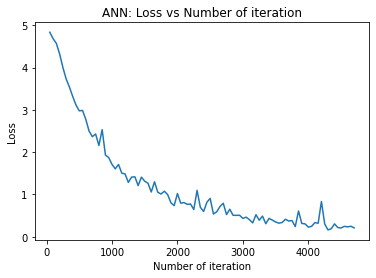

In [21]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

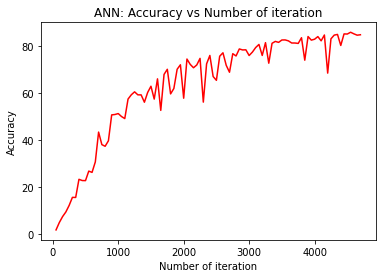

In [22]:
# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()